# MI PRIMER TRAIN-TEST-PREDICT

**TAREA: REGRESIÓN**<br>
**NIVEL: BEGINNER**

Vamos a REPETIR el ejercicio anterior pero en este caso el target será la TEMPERATURA a D+1, por lo que tendremos que EVALUAR el modelo con las métricas de Regresión.

# Libraries

In [1]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('max.columns',100)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/NUCLIO digital school/MODULO 3/Compartida - ML SUPERVISADO/Notebooks/ML1 - Mi primer modelo/ML1-weather_traintest.csv',index_col=0)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.shape

(6812, 27)

In [7]:
df.head()

,fecha,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,W,1,1,0,0,0
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,N,0,1,0,0,0


In [8]:
df.fecha.min(), df.fecha.max()

('1997-01-01', '2015-12-31')

Tenemos un historico de 1997 hasta 2015 de todo el parte meteorologico diario. Como queremos construir un modelo capaz de predecir si llueve al dia siguiente (D+1), utilizaremos la funcion **shift()** para desplazar 1 fila (=1 dia) cada valor de **temperatura_med** en el dataset.

In [9]:
df.set_index('fecha', inplace=True)

In [10]:
df.sort_index(inplace=True)

In [11]:
df['temperatura_D+1'] = df['temperatura_med'].shift(-1)

In [12]:
df.head()

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,temperatura_D+1
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0,3.0
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0,3.0
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,W,1,1,0,0,0,3.0
1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0,0.0
1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,N,0,1,0,0,0,3.0


# ML Preprocessing (express)

* Pulimos nulos y categóricos (type object), lo minimo para poder modelizar. 
* **IMPORTANTE:** Obviaremos la parte de analisis exhaustivo de los datos (EDA), corrección de formatos, gestión de altas correlaciones y bajas varianzas para no demorarnos en el preprocessing pero son steps que se deben realizar para garantizar las condiciones óptimas en el entrenamiento.

## Remove nulls

In [13]:
df.isna().sum() 

temperatura_max        2
temperatura_med        3
temperatura_min        2
rocio_max              2
rocio_med              2
rocio_min              2
humedad_max            2
humedad_med            2
humedad_min            2
presion_max            0
presion_med            0
presion_min            0
visibilidad_max      940
visibilidad_med      940
visibilidad_min      940
viento_max             0
viento_med             0
racha_viento_max    3306
precipitacion          0
nubes               1372
viento_dir             0
ind_lluvia             0
ind_nieve              0
ind_truenos            0
ind_niebla             0
ind_granizo            0
temperatura_D+1        4
dtype: int64

In [14]:
#Eliminamos filas sin TARGET informado (seria contraproducente imputar valores al target del que queremos aprender!)
df.dropna(axis=0, subset=['temperatura_D+1'], inplace=True)

In [15]:
# Parece que hay 3 registros sin la temperatura ni la humedad informada, como son MUY POCOS registros optamos por eliminarlos en lugar de imputar un valor (que dios nos perdone!)
df.dropna(axis=0, subset=['temperatura_med'], inplace=True)

In [16]:
# imputamos la media de cada columna en los nulos restantes
cols_null = list(df.columns[df.isna().sum() >0])
cols_null

['visibilidad_max',
 'visibilidad_med',
 'visibilidad_min',
 'racha_viento_max',
 'nubes']

In [17]:
for col in cols_null:
  df[col] = df[col].fillna(df[col].mean())

In [18]:
print('Total nulos:',df.isna().sum().sum() )

Total nulos: 0


## One-Hot-Encoding

In [19]:
categories = list(df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['viento_dir']


In [20]:
df = pd.get_dummies(df)

In [21]:
categories = list(df.select_dtypes(include='object').columns)
print('Total categoricas:', len(categories))

Total categoricas: 0


In [22]:
df.head(3)

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,temperatura_D+1,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,43.989729,0.0,6.0,0,0,0,0,0,3.0,0,0,0,0,0,0,1,0
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.000000,0.0,5.0,1,0,0,0,0,3.0,0,0,0,0,0,1,0,0
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,43.989729,0.0,6.0,1,1,0,0,0,3.0,0,0,0,0,0,0,0,1


# MODEL

Ya tenemos los datos limpios (*clean data*) para poder modelizar. Vamos ahora a practicar un flujo simple de **TRAIN-TEST-PREDICT**:

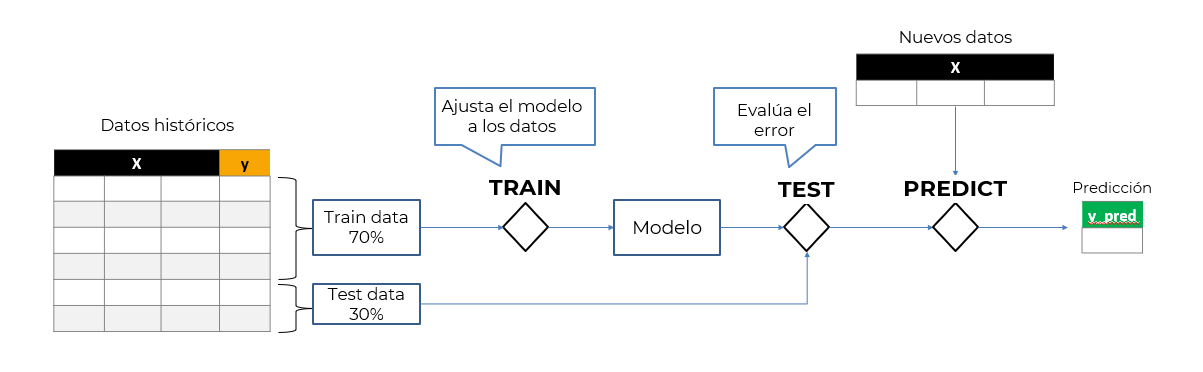

## Split X-y

In [23]:
target = 'temperatura_D+1'

In [24]:
features = [i for i in df.columns if i != target]

In [25]:
y = df[target]
X = df[features]

## Target distribution

In [26]:
y.describe()     # Distribucion

count    6806.000000
mean       14.657949
std         7.579795
min        -3.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        32.000000
Name: temperatura_D+1, dtype: float64

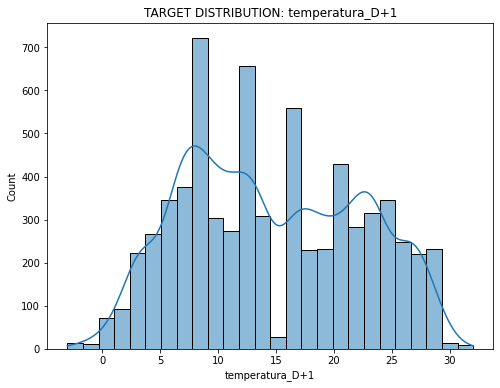

In [32]:
plt.figure(figsize=[8,6])
sns.histplot(y,kde=True)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show() #ver la distribución de una variable NO categórica. En este tipo de modelos los valores del medio son los más representativos

## Split data: Train-Test

Para el test vamos a hacer un **RANDOM HOLDOUT**, una seleccion de dias aleatorios en la muestra con la funcion train_test_split()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X, 
                                        y, 
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        #stratify = y,     stratify no sirve en distribuciones continuas
                                        random_state = 42 # Guarda el split en el seed 42 por si volvemos a ejecutar la celda, sea el mismo split
                                     )

In [31]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 4764
Test data instances: 2042


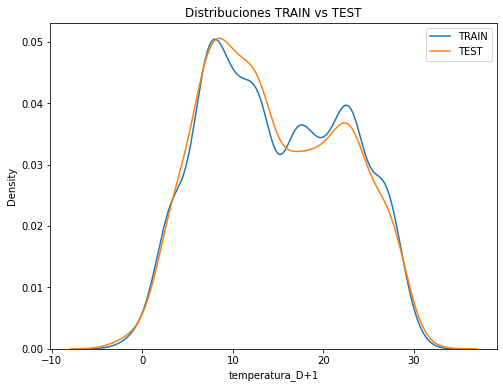

In [33]:
plt.figure(figsize=[8,6])
sns.kdeplot(y_train,label='TRAIN')
sns.kdeplot(y_test,label='TEST')
plt.title('Distribuciones TRAIN vs TEST')
plt.legend()
plt.show()

# Rescaling (!) 
estandarizacion o normalizacion

Esta vez vamos a estandarizar para utilizar un algoritmo que NO es de REGLAS.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [38]:
X_train_std = pd.DataFrame(X_train_std, columns = features) #lo pasamos a dtaframe porque sino nos devuelve arrays
X_test_std = pd.DataFrame(X_test_std, columns = features)

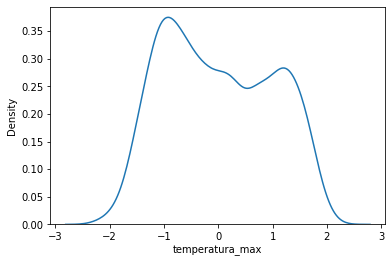

In [39]:
sns.kdeplot(X_train_std['temperatura_max'])
plt.show()

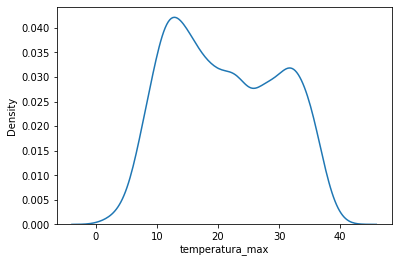

In [40]:
sns.kdeplot(X_train['temperatura_max'])

## TRAIN

Vamos a utilizar Ridge(), un modelo lineal, para generar un modelo de REGRESIÓN entrenado con el TRAIN DATA. Veremos más adelante como funcionan los distintos algoritmos ML.

In [41]:
from sklearn.linear_model import Ridge

In [42]:
model = Ridge()  # declara el algoritmo del modelo ML -> Algoritmo ML + Datos = Modelo ML

In [43]:
model.fit(X_train_std, y_train)           # fit(): entrena el modelo ML con los datos de train

Ridge()

## TEST

Para evaluar el performance del modelo comparamos el dato real (y) con la prediccion (y_pred), a la hora de evaluar mediremos el performance en TRAIN y TEST:
* El error en TEST es el error que estimamos se producirá en el PREDICT.
* La comparativa TRAIN vs TEST nos ayuda a identificar posible OVERFITTING en el ajuste.<br><br>
Las principales métricas de **EVALUACIÓN en REGRESIÓN** son:
* **RMSE**, MAE, MSE
* Distribucion del error

In [44]:
y_train_pred = model.predict(X_train_std)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = model.predict(X_test_std)                          # predicciones del modelo en los datos de TEST

* **RMSE, MAE y MAPE**

In [45]:
error = y_test_pred - y_test.values

In [46]:
mae = np.mean(np.abs(error))
mape = np.mean(error/y_test)
mse = np.mean(error**2)
rmse = np.sqrt(np.mean(error**2))

In [51]:
print('MAE:', round(mae,4))
print('MAPE: {:.3%}'.format(mape)) #da nan porque no puede tener valores cero en la distribuci{on da infinito}
print('MSE:', round(mse,4))
print('RMSE:', round(rmse,4))

MAE: 1.422
MAPE: 3762786074037661.500%
MSE: 3.3485
RMSE: 1.8299


In [52]:
# directamente en sklearn...
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print('MAE:', round(mae,4))
print('MAPE: {:.3%}'.format(mape))
print('MSE:', round(mse,4))
print('RMSE:', round(rmse,4))
print('R2-score',round(r2,4))

MAE: 1.422
MAPE: 3762786074037661.500%
MSE: 3.3485
RMSE: 1.8299
R2-score 0.941


* **Distribución del error e intervalos de confianza**

In [53]:
pd.Series(error).describe()

count    2042.000000
mean        0.142173
std         1.824815
min        -6.032599
25%        -1.043427
50%         0.139355
75%         1.252760
max         9.064345
dtype: float64

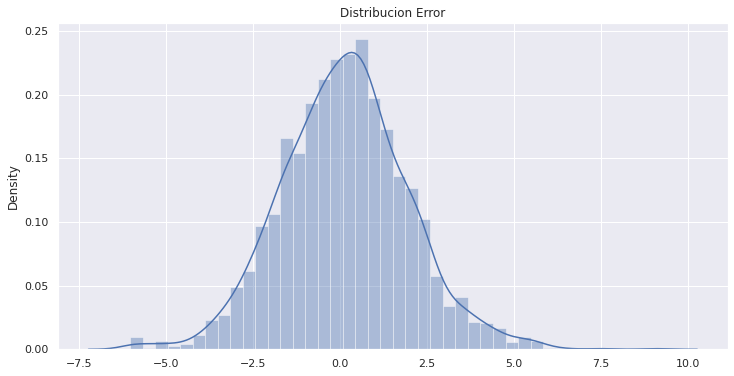

In [50]:
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribucion Error')
plt.show()

In [54]:
confidence=95
z = (100-confidence)/2

print("Error medio absoluto (MAE):", round(np.mean(np.abs(error)),4))
print("Intervalo del error (confianza",confidence,"%):",round(np.percentile(error, 100-z),1),"/",round(np.percentile(error, z),1))

Error medio absoluto (MAE): 1.422
Intervalo del error (confianza 95 %): 3.9 / -3.4


* **Comparativa Prediccion vs Valor real**

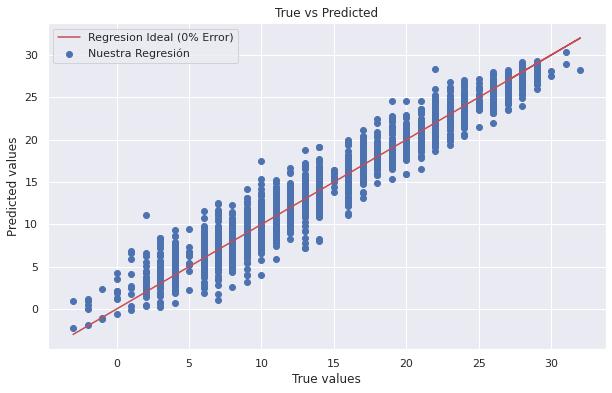

In [55]:
#Compara Prediccion vs dato real
plt.figure(figsize=[10,6])
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r')
plt.title('True vs Predicted')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(['Regresion Ideal (0% Error)','Nuestra Regresión'])
plt.show()

## Model Interpretability

Además de la evaluación del performance del modelo, es importante interpretar cual es la definición del modelo tras entrenarse. Por ejemplo, cuales son las variables más determinantes del modelo a la hora de realizar una predicción:

In [60]:
f_importances = model.coef_ #como es regresion la importancia se da a traves de los coeficientes

In [61]:
top_features = pd.DataFrame({'feature': features, 'importance': f_importances})

In [62]:
top_features = top_features.sort_values('importance', ascending=False).reset_index(drop=True)
top_features.head(10)

,feature,importance
0,temperatura_max,5.129157
1,humedad_min,1.498220
2,temperatura_min,0.941022
3,presion_med,0.650043
4,rocio_med,0.624377
5,rocio_max,0.423845
6,visibilidad_max,0.291316
7,temperatura_med,0.230731
8,nubes,0.136901
9,ind_lluvia,0.125593


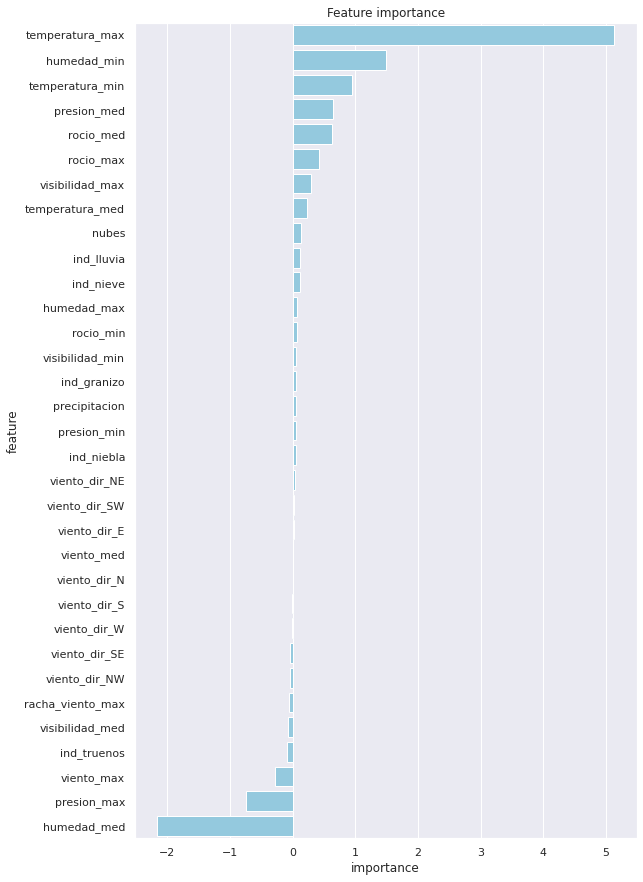

In [63]:
plt.figure(figsize=[9,15])
sns.barplot(data=top_features, y='feature',x='importance',color='skyblue')
plt.title('Feature importance')
plt.show()

## Save model

In [65]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/NUCLIO digital school/MODULO 3/ML /ML -modelo de Regresión.pkl', 'wb'))

# PREDICT

## Load new data

En la practica habria que aplicar de vuelta las mismas tecnicas de preprocessing aplicadas anteriormente para limpiar los nuevos datos. A modo didáctico, trabajaremos directamente con una muestra ya preprocesada para hacer el predict.

In [66]:
sample_predict = pd.read_csv('/content/drive/MyDrive/NUCLIO digital school/MODULO 3/Compartida - ML SUPERVISADO/Notebooks/ML1 - Mi primer modelo/ML1-weather_predict.csv',index_col=0)
sample_predict.T

,2022-12-28
temperatura_max,15.00
temperatura_med,8.00
temperatura_min,2.00
rocio_max,8.00
rocio_med,4.00
rocio_min,1.00
humedad_max,100.00
humedad_med,78.00
humedad_min,34.00
presion_max,1031.00


# Rescaling

In [73]:
sample_predict = scaler.transform(sample_predict) #hay que estandarizar el dato, el transform

## Load model

In [68]:
model = pickle.load(open("/content/drive/MyDrive/NUCLIO digital school/MODULO 3/ML /ML -modelo de Regresión.pkl", 'rb'))

## ¿Qué temperatura hace mañana?

In [71]:
predict = model.predict(sample_predict)[0]

In [72]:
print('Temperatura mañana: {:.2}Cº'.format(predict))
print('Error medio absoluto (MAE): {:.2}Cº'.format(mae))

Temperatura mañana: 8.5Cº
Error medio absoluto (MAE): 1.4Cº
